## Defining instrument_detector

In [2]:
import os
import librosa
import numpy as np
from pathlib import Path
import subprocess

In [4]:
# Use the full path (adjust for your username)
ailh_bass = "/Users/vanshc/Desktop/Split/separated/htdemucs_ft/DELETE_Passenger_And_I_Love_Her_(Official_Video)/bass.wav"
ailh_vocals = "/Users/vanshc/Desktop/Split/separated/htdemucs_ft/DELETE_Passenger_And_I_Love_Her_(Official_Video)/vocals.wav"
dm_bass = "/Users/vanshc/Desktop/Split/separated/htdemucs_ft/DELETE_Dil_Mere/bass.wav"

In [44]:
ailh_bass, sr = librosa.load(ailh_bass)
ailh_vocals, sr = librosa.load(ailh_vocals)
dm_bass, sr = librosa.load(dm_bass)

In [45]:
librosa.onset.onset_detect(y=ailh_bass, sr=22050, units='time')

array([6.96598639e-02, 1.23065760e+00, 1.50929705e+00, 1.62539683e+00,
       1.81115646e+00, 2.02013605e+00, 2.36843537e+00, 2.71673469e+00,
       2.87927438e+00, 3.20435374e+00, 3.41333333e+00, 3.71519274e+00,
       3.92417234e+00, 4.04027211e+00, 4.38857143e+00, 4.76009070e+00,
       5.10839002e+00, 5.57278912e+00, 5.78176871e+00, 5.89786848e+00,
       6.40870748e+00, 6.73378685e+00, 6.94276644e+00, 7.05886621e+00,
       7.40716553e+00, 7.73224490e+00, 8.24308390e+00, 8.54494331e+00,
       9.05578231e+00, 9.24154195e+00, 9.40408163e+00, 9.72916100e+00,
       1.00542404e+01, 1.04025397e+01, 1.08901587e+01, 1.10991383e+01,
       1.12152381e+01, 1.17492971e+01, 1.21208163e+01, 1.22369161e+01,
       1.25852154e+01, 1.27941950e+01, 1.31192744e+01, 1.34675737e+01,
       1.36068934e+01, 1.37926531e+01, 1.39319728e+01, 1.41177324e+01,
       1.44195918e+01, 1.46285714e+01, 1.47678912e+01, 1.50929705e+01,
       1.54412698e+01, 1.57895692e+01, 1.61146485e+01, 1.62539683e+01,
      

In [46]:
librosa.onset.onset_detect(y=dm_bass, sr=22050, units='time')

array([ 64.22639456,  64.87655329,  65.4338322 ,  66.82702948,
        67.87192744,  68.10412698,  69.40444444,  70.03138322,
        70.61188209,  71.98185941,  73.25895692,  74.55927438,
        75.20943311,  76.50975057,  77.1599093 ,  77.78684807,
        78.27446712,  78.46022676,  79.06394558,  79.62122449,
        79.73732426,  80.38748299,  81.03764172,  81.6645805 ,
        82.31473923,  82.941678  ,  83.45251701,  83.61505669,
        84.24199546,  84.8921542 ,  85.54231293,  86.19247166,
        87.1444898 ,  87.44634921,  88.44480726,  88.72344671,
        89.60580499,  89.74512472,  90.04698413,  90.65070295,
        91.34730159,  92.29931973,  92.62439909,  93.50675737,
        93.85505669,  93.9014966 ,  95.20181406,  95.85197279,
        96.50213152,  97.15229025,  97.45414966,  97.6399093 ,
        97.80244898,  98.75446712,  99.07954649, 100.03156463,
       100.35664399, 101.03002268, 101.65696145, 102.49287982,
       102.60897959, 102.93405896, 103.60743764, 103.90

In [47]:
librosa.onset.onset_detect(y=ailh_vocals, sr=22050, units='time')

array([ 23.4521542 ,  23.89333333,  23.9629932 ,  24.10231293,
        24.52027211,  24.84535147,  24.9846712 ,  25.33297052,
        26.74938776,  26.9815873 ,  27.77106576,  28.30512472,
        30.16272109,  30.30204082,  30.44136054,  30.62712018,
        30.95219955,  31.18439909,  31.230839  ,  31.60235828,
        32.15963719,  32.34539683,  32.76335601,  32.9723356 ,
        33.2277551 ,  33.85469388,  34.11011338,  34.34231293,
        35.80517007,  36.17668934,  36.38566893,  36.64108844,
        36.89650794,  37.05904762,  37.2215873 ,  38.68444444,
        38.84698413,  38.98630385,  39.03274376,  39.26494331,
        39.63646259,  39.9847619 ,  40.26340136,  40.42594104,
        40.79746032,  41.67981859,  41.7262585 ,  42.4460771 ,
        42.74793651,  47.55446712,  47.92598639,  48.20462585,
        48.59936508,  48.78512472,  48.9476644 ,  49.13342404,
        50.64272109,  50.99102041,  51.10712018,  51.61795918,
        51.80371882,  53.93995465,  54.14893424,  54.42

In [48]:
print(len(ailh_bass)/sr)
print(len(ailh_vocals)/sr)
print(len(dm_bass)/sr)

164.96621315192743
164.96621315192743
260.73687074829934


In [49]:
print(np.mean(librosa.feature.rms(y=ailh_bass)[0]))
print(np.mean(librosa.feature.rms(y=ailh_vocals)[0]))
print(np.mean(librosa.feature.rms(y=dm_bass)[0]))


6.236887e-05
0.037982818
0.042678505


In [ ]:
def detect_instrument_presence(stem_audio, sr=22050):
    
    """Simple energy-based detection"""
    
    # Average loudness/energy
    mean_rms_energy = np.mean(librosa.feature.rms(y=stem_audio)[0])
    
    # Threshold (tune this!)
    energy_threshold = 0.0001  # Adjust based on your data
    
    return 1 if mean_rms_energy > energy_threshold else 0

## Database Generation

In [2]:
import sqlite3

In [3]:
conn = sqlite3.connect('song_database.db')

In [6]:
# Instantiates the database

def create_tables(conn):
    cursor = conn.cursor()
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS songs (
        song_id INTEGER PRIMARY KEY AUTOINCREMENT,
        title TEXT NOT NULL,
        artist TEXT,
        duration REAL,
        vocals BOOLEAN,
        bass BOOLEAN,
        drums BOOLEAN,
        others BOOLEAN
    )
    ''')
    conn.commit()

def insert_song(conn, title, artist, duration, vocals, bass, drums, others):
    cursor = conn.cursor()
    cursor.execute('''
    INSERT INTO songs (title, artist, duration, vocals, bass, drums, others)
    VALUES (?, ?, ?, ?, ?, ?, ?)
    ''', (title, artist, duration, vocals, bass, drums, others))
    conn.commit()
    return cursor.lastrowid  # Returns the song_id

def fetch_all_songs(conn):
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM songs')
    return cursor.fetchall()

I could add a BLOB here, if need be? idk if i wanna store that in my database though bcs I don't want a huge database with all the audio files. The info from them is less storage

In [12]:
!pip install -U demucs

  Using cached demucs-4.0.1-py3-none-any.whl
  Using cached dora_search-0.1.12-py3-none-any.whl
  Using cached einops-0.8.1-py3-none-any.whl.metadata (13 kB)
  Using cached julius-0.2.7-py3-none-any.whl
  Using cached lameenc-1.8.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.9 kB)
  Using cached openunmix-1.3.0-py3-none-any.whl.metadata (17 kB)
  Using cached PyYAML-6.0.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached torch-2.7.1-cp313-none-macosx_11_0_arm64.whl.metadata (29 kB)
  Using cached torchaudio-2.7.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached mpmath-1.3.0

In [24]:
create_tables(conn)
"/Users/vanshc/Desktop/Split/separated/htdemucs_ft/DELETE_Passenger_And_I_Love_Her_(Official_Video)/vocals.wav"

def separate_stems(parent_folder):
    for song_file in Path(parent_folder).glob("*.mp3"):
        # y, sr = librosa.load(song_file)
        # duration = librosa.get_duration(y=y, sr=sr)
        
        command = [
                "demucs",
                "-n", "htdemucs",
                "-o", str(parent_folder), # maybe add a /trying or some subfolder here
                str(song_file)
            ]
        
        subprocess.run(command, check=True)


In [27]:
separate_stems("/Users/vanshc/Desktop/Songs/trial")

Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /Users/vanshc/Desktop/Songs/trial/htdemucs
Separating track /Users/vanshc/Desktop/Songs/trial/YuraSoop - Summer Funky Groove.mp3


100%|██████████████████████████████████████████████| 140.39999999999998/140.39999999999998 [01:16<00:00,  1.83seconds/s]


In [88]:
detect_basic_info("/Users/vanshc/Desktop/Songs/trial/htdemucs/YuraSoop - Summer Funky Groove")

('Summer Funky Groove', 'YuraSoop', 136.54204081632653)

In [34]:
def detect_basic_info(song_folder):
    artist, title = os.path.basename(song_folder).split(" - ", 1)
    sample = librosa.load(song_folder / 'vocals.wav', sr=22050)
    duration = librosa.get_duration(y=sample, sr=22050)

    return title.strip(), artist.strip(), duration

In [86]:
def detect_instrument_presence_stem(stem_audio, sr=22050):
    
    # Average loudness/energy
    mean_rms_energy = np.mean(librosa.feature.rms(y=stem_audio)[0])
    
    # Threshold (tune this!)
    energy_threshold = 0.0001  # Adjust based on your data
    
    return 1 if mean_rms_energy > energy_threshold else 0


def detect_instrument_presence_song(song_folder):

    stem_files = {}
    for audio_file in song_folder.glob("*.wav"):
        stem_name = audio_file.stem  
        stem_files[stem_name] = audio_file # bass.wav: file_path

    expected_stems = ['vocals', 'drums', 'bass', 'other']
    results = {}
    
    # Check each expected stem
    for stem_name in expected_stems:
        if stem_name in stem_files:
            try:
                # Load the stem audio
                stem_audio, _ = librosa.load(stem_files[stem_name], sr=22050)
                
                # Run your detection method
                presence = detect_instrument_presence_stem(stem_audio)
                results[stem_name] = presence
                
            except Exception as e:
                print(f"  Error analyzing {stem_name}: {e}")
                results[stem_name] = 0
        else:
            print(f"  Warning: {stem_name}.wav not found")
            results[stem_name] = 0
    
    return results['vocals'], results['drums'], results['bass'], results['other']


In [89]:
conn = sqlite3.connect('song_database.db')
create_tables(conn)

vocals, drums, bass, other = detect_instrument_presence_song(Path("/Users/vanshc/Desktop/Songs/trial/htdemucs/YuraSoop - Summer Funky Groove"))
title, artist, duration = detect_basic_info(Path("/Users/vanshc/Desktop/Songs/trial/htdemucs/YuraSoop - Summer Funky Groove"))
insert_song(conn, title, artist, duration, vocals, bass, drums, other)

1

In [89]:
import IPython.display as ipd

other, sr = librosa.load("/Users/vanshc/Desktop/Songs/htdemucs/Kevin MacLeod - Hustle/other.wav")
bass_jazz, sr = librosa.load("/Users/vanshc/Desktop/Songs/htdemucs/Ketsa - Jazz for the Solstice/bass.wav")
vocals, _ = librosa.load("/Users/vanshc/Desktop/Songs/htdemucs/Kevin MacLeod - Hustle/vocals.wav")

ipd.Audio(other, rate = sr)

<Axes: >

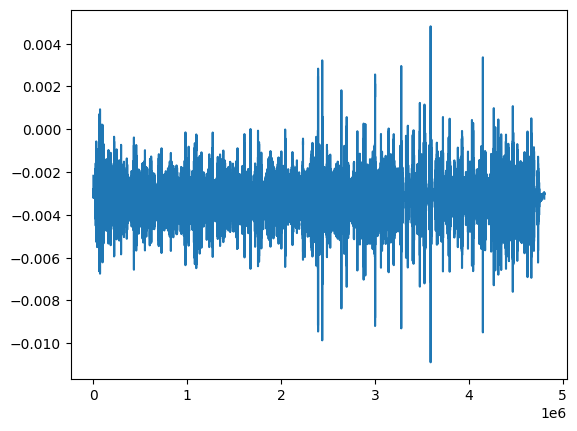

In [87]:
import pandas as pd

pd.Series(vocals).plot()

<Axes: >

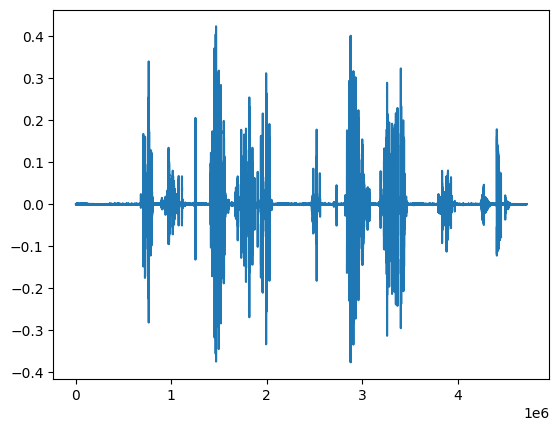

In [90]:
pd.Series(bass_jazz).plot()

Testing the method is_song_already_processed(conn, file)

In [47]:
print(np.mean(librosa.feature.rms(y=vocals)[0]))
print(np.mean(librosa.feature.rms(y=other)[0]))


0.0015814038
0.050200347


In [83]:
drums, _ = librosa.load("/Users/vanshc/Desktop/Songs/htdemucs/Scott Joplin - Ragtime Dance/drums.wav")
bass, _ = librosa.load("/Users/vanshc/Desktop/Songs/htdemucs/Scott Joplin - Ragtime Dance/bass.wav")
other, sr = librosa.load("/Users/vanshc/Desktop/Songs/htdemucs/Scott Joplin - Ragtime Dance/other.wav")
vocals, _ = librosa.load("/Users/vanshc/Desktop/Songs/htdemucs/Scott Joplin - Ragtime Dance/vocals.wav")

In [84]:
print(np.mean(librosa.feature.rms(y=vocals)[0]))
print(np.mean(librosa.feature.rms(y=other)[0]))
print(np.mean(librosa.feature.rms(y=drums)[0]))
print(np.mean(librosa.feature.rms(y=bass)[0]))

0.003274257
0.15687977
0.0033112874
0.003216753


In [56]:
if np.mean(librosa.feature.rms(y=drums)[0]) > 0.01:
    print(1)

In [76]:
import importlib
import extractor  # must import the whole module
importlib.reload(extractor)

from extractor import detect_instrument_presence_stem
detect_instrument_presence_stem(drums)

0

In [73]:
# Average loudness/energy
mean_rms_energy = np.mean(librosa.feature.rms(y=drums)[0])

# Threshold (tune this!)
energy_threshold = 0.01  # Adjust based on your data

if mean_rms_energy > energy_threshold:
    print(1) 
else:
    print(0)

print(mean_rms_energy)

0
0.003310549


In [77]:
print(detect_instrument_presence_stem(drums))
print(detect_instrument_presence_stem(bass))
print(detect_instrument_presence_stem(other))
print(detect_instrument_presence_stem(vocals))

0
0
1
0


In [ ]:
parent_folder = "/Users/vanshc/Desktop/Songs"

conn = sqlite3.connect('song_database.db')

create_tables(conn)

for song_file in Path(parent_folder).glob("*.mp3"):
    is_song_already_processed(conn, song_file)

In [9]:
for song_file in Path("/Users/vanshc/Desktop/Songs").glob("*.mp3"):
    print(song_file.name)
    

Ketsa - Jazz for the Solstice.mp3
Beat Mekanik - Flirty.mp3
State Shirt - Computer.mp3
Double-F the King - Awware.mp3
YuraSoop - Summer Funky Groove.mp3
Jon Shuemaker - I Am Not Your Victim.mp3


## Setting up the LLM

In [97]:
import os
os.environ["GROQ_API_KEY"] = "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"

In [98]:
smth = os.environ.get("GROQ_API_KEY")

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


In [100]:
from groq import Groq
client = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Explain the importance of fast language models",
        }
    ],
    model="llama-3.3-70b-versatile",
)

print(chat_completion.choices[0].message.content)

Fast language models are crucial in natural language processing (NLP) as they enable efficient and effective processing of large amounts of language data. The importance of fast language models can be seen in several areas:

1. **Improved Response Time**: Fast language models can generate responses quickly, which is essential for applications like chatbots, virtual assistants, and language translation software. This enables users to receive rapid and accurate responses, enhancing their overall experience.
2. **Scalability**: Fast language models can handle a large volume of requests, making them suitable for large-scale applications, such as language translation, text summarization, and sentiment analysis.
3. **Real-Time Processing**: Fast language models can process language data in real-time, allowing for applications like live language translation, real-time sentiment analysis, and instant text summarization.
4. **Energy Efficiency**: Fast language models can reduce the computationa

In [109]:
from pprint import pprint
pprint(chat_completion.model_dump())

{'choices': [{'finish_reason': 'stop',
              'index': 0,
              'logprobs': None,
              'message': {'content': 'Fast language models are crucial in '
                                     'natural language processing (NLP) as '
                                     'they enable efficient and effective '
                                     'processing of large amounts of language '
                                     'data. The importance of fast language '
                                     'models can be seen in several areas:\n'
                                     '\n'
                                     '1. **Improved Response Time**: Fast '
                                     'language models can generate responses '
                                     'quickly, which is essential for '
                                     'applications like chatbots, virtual '
                                     'assistants, and language translation '
                

In [111]:
name = "vansh"

In [120]:
print(
    
f"""hello what's up, {name}?
Checking how new lines work"""
)

hello what's up, vansh?
Checking how new lines work


Testing the SQL generation using groq, validation, and running that query

In [26]:
os.getcwd()

'/Users/vanshc/Documents/GitHub/whatcha-lookin-for'

In [28]:
import importlib
import sqlite3
import prompt_to_sql
importlib.reload(prompt_to_sql)

from prompt_to_sql import convert_user_prompt_to_sql_query, validate_sql_query
from dotenv import load_dotenv

load_dotenv()

convert_user_prompt_to_sql_query("Recommend hip-hop songs that use the guitar")

"SELECT title, artist, album FROM tracks WHERE scraped_from_genre = 'hip-hop' AND guitar = 1 \n-- Note: 'genre' in 'hip-hop' is assumed to be 'scraped_from_genre' as 'genre' is not a supported field, actual genre filtering may not work as intended"

In [17]:
validate_sql_query('SELECT title, artist, duration_in_seconds, filename \nFROM songs \nWHERE duration_in_seconds > 150 AND vocals = 0')

True

In [11]:
import os

In [16]:
os.getcwd()

'/Users/vanshc/Documents/GitHub/whatcha-lookin-for/backend'

In [21]:
import sqlite3

In [28]:
conn = sqlite3.connect("/Users/vanshc/Documents/GitHub/whatcha-lookin-for/backend/song_database.db")
cursor = conn.cursor()
cursor.execute('SELECT title, artist, duration_in_seconds, filename \nFROM songs \nWHERE duration_in_seconds > 150 AND vocals = 0')
results = cursor.fetchall()
# Only return top 5
results = results[:5]
# Only return title, artist, duration
response = [
    {
        "title": row[1],
        "artist": row[2],
        "duration": row[3]
    }
    for row in results
]
conn.close()
print({"results": response})

{'results': [{'title': 'Scott Joplin', 'artist': 217.86122448979592, 'duration': 'Scott Joplin - Ragtime Dance.mp3'}]}


## Extracting genre (maybe cover art)

In [23]:
mutagen.File("/Users/vanshc/Desktop/Songs/Double-F the King - Awware.mp3")['TCON'].text[0]

'R and B'

In [41]:
from mutagen.id3 import ID3

ID3("/Users/vanshc/Desktop/Songs/State Shirt - Computer.mp3")['APIC:'].data

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00d\x00d\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00P\x00\x00\xff\xee\x00\x0eAdobe\x00d\xc0\x00\x00\x00\x01\xff\xdb\x00\x84\x00\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x04\x03\x02\x02\x03\x04\x05\x04\x04\x04\x04\x04\x05\x06\x05\x05\x05\x05\x05\x05\x06\x06\x07\x07\x08\x07\x07\x06\t\t\n\n\t\t\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x01\x03\x03\x03\x05\x04\x05\t\x06\x06\t\r\x0b\t\x0b\r\x0f\x0e\x0e\x0e\x0e\x0f\x0f\x0c\x0c\x0c\x0c\x0c\x0f\x0f\x0c\x0c\x0c\x0c\x0c\x0c\x0f\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc0\x00\x11\x08\x03 \x03 \x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\xc6\x00\x00\x02\x03\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x06\x07\x04\x05\x08\x03\x02\t\x01\x00\n\x01\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x01\x00\x07\x08\x10\x00\x01\x03\x03

In [31]:

def get_genre(file_path):
    audio = mutagen.File(file_path)
    if audio and 'TCON' in audio: # this is where the genre is
        return audio['TCON'].text[0]
    else:
        return None  # or "" or "Unknown"
    


In [43]:
waddup = {"file": "Heres/some/path",
          "image": 'heres/a/jpeg/or/whatever'}

In [49]:
for i in waddup.keys():
    print(i)

file
image


In [58]:
from extractor import detect_genre
from pathlib import Path

genres = []

# Running stem separation
for song_file in Path("/Users/vanshc/Desktop/Songs").glob("*.mp3"):
    genres.append(detect_genre(song_file))

print(genres)

['unknown', 'Blues Pop', 'Indie-Rock', 'R and B', 'unknown', 'ROCK']


In [ ]:
cursor = conn.cursor()
for p in paths_n_genres:
    cursor.execute('UPDATE songs SET genre = ? WHERE filename = ?', ())

In [68]:
for folder in (Path("/Users/vanshc/Desktop/Songs") / 'htdemucs').iterdir():
    print(folder)

/Users/vanshc/Desktop/Songs/htdemucs/Scott Joplin - Ragtime Dance
/Users/vanshc/Desktop/Songs/htdemucs/.DS_Store
/Users/vanshc/Desktop/Songs/htdemucs/Jon Shuemaker - I Am Not Your Victim
/Users/vanshc/Desktop/Songs/htdemucs/Double-F the King - Awware
/Users/vanshc/Desktop/Songs/htdemucs/Ketsa - Jazz for the Solstice
/Users/vanshc/Desktop/Songs/htdemucs/YuraSoop - Summer Funky Groove
/Users/vanshc/Desktop/Songs/htdemucs/Kevin MacLeod - Hustle
/Users/vanshc/Desktop/Songs/htdemucs/State Shirt - Computer
/Users/vanshc/Desktop/Songs/htdemucs/Beat Mekanik - Flirty


In [86]:
files_genres = {}

for song_file in Path(Path("/Users/vanshc/Desktop/Songs")).glob("*.mp3"):
    files_genres[song_file.name] = detect_genre(song_file)

files_genres

{'Ketsa - Jazz for the Solstice.mp3': 'unknown',
 'Beat Mekanik - Flirty.mp3': 'Blues Pop',
 'State Shirt - Computer.mp3': 'Indie-Rock',
 'Double-F the King - Awware.mp3': 'R and B',
 'YuraSoop - Summer Funky Groove.mp3': 'unknown',
 'Jon Shuemaker - I Am Not Your Victim.mp3': 'ROCK'}

In [103]:
import sqlite3

In [110]:
conn = sqlite3.connect("song_database.db")
cursor = conn.cursor()
for i in files_genres:
    cursor.execute('UPDATE songs SET genre = ? WHERE filename = ?', (files_genres[i], i))

OperationalError: near "Shuemaker": syntax error

In [123]:
conn = sqlite3.connect('song_database.db')

In [124]:
cursor = conn.cursor()

In [125]:
cursor.execute('UPDATE songs SET genre = ? WHERE filename = ?', ('Rock', 'Jon Shuemaker - I Am Not Your Victim.mp3'))

In [126]:
conn.commit()

In [127]:
conn.close()

## Learning Web Scraping

In [9]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import json

In [ ]:
genres = [Rock, Soul-RnB]

In [3]:
html_code = requests.get("https://freemusicarchive.org/music/charts/all?genre=3&sort=listens&pageSize=100").text

In [4]:
soup = BeautifulSoup(html_code, 'html.parser')

In [176]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <script async="" data-cbid="ddc77b98-22e4-4592-8485-87aa94702238" data-framework="TCFv2.2" id="Cookiebot" src="https://consent.cookiebot.com/uc.js" type="text/javascript">
  </script>
  <meta charset="utf-8"/>
  <meta content="QrolBzMngsFhEmduj5GY3cBF9ha0uEkhVCTIGb73" name="csrf-token"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   All time's chart - Free Music Archive
  </title>
  <meta content="All time's chart. Listen to Free Music Archive's most popular music." name="description"/>
  <meta content="$ilp.gatehub.net/484357631" name="monetization"/>
  <link href="/img/favicon.svg" rel="shortcut icon" type="image/x-icon"/>
  <link href="https://freemusicarchive.org/home" rel="author"/>
  <script crossorigin="anonymous" integrity="sha256-u7e5khyithlIdTpu22PHhENmPcRdFiHRjhAuHcs05RI=" src="https://code.jquery.com/jquery-3.6.0.slim.min.js">
  </script>
  <link crossorigin="" href="https://a.pub.network/" re

In [199]:
for i in soup.select('div.play-item'):
    raw_data = i.get('data-track-info')
    info = json.loads(raw_data)
    track_id = track_info.get("id")
    title = track_info.get("title")
    artist = track_info.get("artistName")
    album = track_info.get("albumTitle")
    file_url = track_info.get("fileUrl")
    file_name = track_info.get("fileName")
    download_url = track_info.get("downloadUrl")

    print(info, track_id, title, artist, album, file_url, file_name, download_url)
    


50888
50892
50890
35970
68888
50891
194416
79885
162722
45382
193332
198384
127089
156500
61487
176521
172212
206156
79884
192573
131577
192010
57802
193553
169704
136940
68889
72726
203140
192399
168038
62338
62431
62435
114068
191996
79879
198383
204043
57843
179896
61468
193183
203569
193146
203141
79883
197687
198788
61489
159539
205750
15510
210213
207169
205360
206940
132491
168034
205492
199746
197641
186493
198111
203137
192800
202590
108351
198874
196882
148658
176518
79882
179975
191847
140193
172185
79878
205261
26005
79875
196228
192153
205514
79877
204044
183711
192811
193330
79881
192567
203716
147550
79880
167388
79876
198113
193698
198805
146155


In [12]:
for i in soup.select('div.play-item'):
    temp = json.loads(i.get('data-track-info'))
    print(temp)

{'id': 50888, 'handle': 'DD_Groove', 'url': 'https://freemusicarchive.org/music/Kevin_MacLeod/Blues_Sampler/DD_Groove/', 'title': 'DD Groove', 'artistName': 'Kevin MacLeod', 'artistUrl': 'https://freemusicarchive.org/music/Kevin_MacLeod/', 'albumTitle': 'Blues Sampler', 'playbackUrl': 'https://freemusicarchive.org/track/DD_Groove/stream/', 'downloadUrl': 'https://freemusicarchive.org/track/DD_Groove/download/', 'fileName': 'Kevin_MacLeod_-_04_-_DD_Groove.mp3', 'fileUrl': 'https://files.freemusicarchive.org/storage-freemusicarchive-org/music/WFMU/Kevin_MacLeod/Blues_Sampler/Kevin_MacLeod_-_04_-_DD_Groove.mp3'}
{'id': 50892, 'handle': 'Slow_Burn', 'url': 'https://freemusicarchive.org/music/Kevin_MacLeod/Blues_Sampler/Slow_Burn/', 'title': 'Slow Burn', 'artistName': 'Kevin MacLeod', 'artistUrl': 'https://freemusicarchive.org/music/Kevin_MacLeod/', 'albumTitle': 'Blues Sampler', 'playbackUrl': 'https://freemusicarchive.org/track/Slow_Burn/stream/', 'downloadUrl': 'https://freemusicarchive.

In [153]:
soup.select('a[href^="/track/"]')

[]

<module 'posixpath' (frozen)>


In [160]:

import os

BASE_URL = "https://freemusicarchive.org"
GENRE_IDS = [3, 4, 9, 10, 12, 14, 17, 21]
DOWNLOAD_DIR = "downloads"
os.makedirs(DOWNLOAD_DIR, exist_ok=True)

seen_tracks = set()
download_count = 0

for genre_id in GENRE_IDS:
    chart_url = f"{BASE_URL}/music/charts/all?genre={genre_id}&sort=listens&pageSize=100"
    print(f"\n🎧 Fetching genre {genre_id} from: {chart_url}")

    response = requests.get(chart_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    track_links = soup.select('a[href^="/track/"]')
    genre_track_urls = list({urljoin(BASE_URL, a['href']) for a in track_links})
    print(genre_track_urls)


🎧 Fetching genre 3 from: https://freemusicarchive.org/music/charts/all?genre=3&sort=listens&pageSize=100

🎧 Fetching genre 4 from: https://freemusicarchive.org/music/charts/all?genre=4&sort=listens&pageSize=100

🎧 Fetching genre 9 from: https://freemusicarchive.org/music/charts/all?genre=9&sort=listens&pageSize=100

🎧 Fetching genre 10 from: https://freemusicarchive.org/music/charts/all?genre=10&sort=listens&pageSize=100

🎧 Fetching genre 12 from: https://freemusicarchive.org/music/charts/all?genre=12&sort=listens&pageSize=100

🎧 Fetching genre 14 from: https://freemusicarchive.org/music/charts/all?genre=14&sort=listens&pageSize=100

🎧 Fetching genre 17 from: https://freemusicarchive.org/music/charts/all?genre=17&sort=listens&pageSize=100

🎧 Fetching genre 21 from: https://freemusicarchive.org/music/charts/all?genre=21&sort=listens&pageSize=100
[]


In [147]:
from tqdm import tqdm

for i in tqdm(range(100000000)):
    # Your code here
    continue

100%|██████████| 100000000/100000000 [00:08<00:00, 11730847.85it/s]


REMEMBER TO USE 6 STEM SEPARATOR AND ADD GUITAR, PIANO IN ALL SQLITE STUFF (also refactor that)!

In [ ]:
# Fetch the genre mapping
cursor.execute("SELECT * FROM genres")
genre_rows = cursor.fetchall()
genre_mapping = {genre_id: genre_name for genre_id, genre_name in genre_rows}

# Format genre mapping as readable text
genre_list_text = "\n".join([f"{gid}: {gname}" for gid, gname in genre_mapping.items()])


In [9]:
# TODO: I'll definitely cache this at some point

import sqlite3
conn = sqlite3.connect('song_database_trial.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM genres")
genre_rows = cursor.fetchall()

genre_list_text = "\n".join([f"{gid}: {gname}" for gid, gname in genre_mapping.items()])

In [31]:
import sqlite3
conn = sqlite3.connect('song_database_trial.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM tracks")
results = cursor.fetchall()
results = results[:5]

response = [{row}
             for row in results]
print(response)

[{(10, 'Freeway', 'Kurt Vile', 'Constant Hitmaker', 75985, 'Kurt_Vile_-_01_-_Freeway.mp3', 'https://files.freemusicarchive.org/storage-freemusicarchive-org/music/WFMU/Kurt_Vile/Constant_Hitmaker/Kurt_Vile_-_01_-_Freeway.mp3', '10', 1, 1, 1, 1, 0, 0)}, {(825, 'Death March', 'Here Comes A Big Black Cloud!!', 'Pompeii', 43442, 'Here_Comes_A_Big_Black_Cloud_-_01_-_Death_March.mp3', 'https://files.freemusicarchive.org/storage-freemusicarchive-org/music/WFMU/Here_Comes_A_Big_Black_Cloud/Pompeii/Here_Comes_A_Big_Black_Cloud_-_01_-_Death_March.mp3', '12', 0, 1, 0, 1, 1, 1)}, {(826, 'Graverobbin', 'Here Comes A Big Black Cloud!!', 'Pompeii', 46823, 'Here_Comes_A_Big_Black_Cloud_-_03_-_Graverobbin.mp3', 'https://files.freemusicarchive.org/storage-freemusicarchive-org/music/WFMU/Here_Comes_A_Big_Black_Cloud/Pompeii/Here_Comes_A_Big_Black_Cloud_-_03_-_Graverobbin.mp3', '12', 1, 1, 0, 1, 0, 0)}, {(8942, 'Jump Up', 'The Diskettes', '05', 47679, 'The_Diskettes_-_02_-_Jump_Up.mp3', 'https://files.free

In [46]:
def get_track_genres(conn, track_id):
    """Get all genres for a specific track"""
    cursor = conn.cursor()
    cursor.execute("""
        SELECT g.name 
        FROM genres g
        JOIN track_genres tg ON g.id = tg.genre_id
        WHERE tg.track_id = ?
    """, (track_id,))
    return [row[0] for row in cursor.fetchall()]

conn = sqlite3.connect('backend/song_database_trial.db')
get_track_genres(conn, 21622)

['Folk', 'Experimental Pop', 'Bluegrass']

In [75]:
import importlib
import sqlite3
import prompt_to_sql
importlib.reload(prompt_to_sql)

from prompt_to_sql import convert_user_prompt_to_sql_query, validate_sql_query
from dotenv import load_dotenv

load_dotenv()

conn = sqlite3.connect('backend/song_database_trial.db')
sql_query = convert_user_prompt_to_sql_query("Recommend hip-hop songs that use the guitar", conn)

In [76]:
validate_sql_query(sql_query)

True

In [77]:
print(sql_query)

SELECT t.id, t.title, t.artist, t.album, t.listen_count 
FROM tracks t 
JOIN track_genres tg ON t.id = tg.track_id 
JOIN genres g ON tg.genre_id = g.id 
WHERE (g.name = 'Hip-Hop' OR g.name = 'Hip-Hop Beats') AND t.guitar = 1 
-- filter by guitar is supported, but other instrument-specific filters like chords, bpm are not applicable 
ORDER BY t.listen_count DESC 
LIMIT 5


In [72]:
import prompt_to_sql
importlib.reload(prompt_to_sql)

from prompt_to_sql import validate_sql_query
from dotenv import load_dotenv

In [54]:
conn = sqlite3.connect('backend/song_database_trial.db')

In [78]:
cursor = conn.cursor()
cursor.execute(sql_query)
temp = cursor.fetchall()

In [79]:
print(temp)

[(24425, 'Fater Lee', 'Black Ant', 'Free Beats Sel. 3', 805178), (63807, 'As Colorful As Ever', 'Broke For Free', 'Layers', 410550), (22295, 'Sorry', 'Comfort Fit', 'Forget And Remember', 257532), (191826, 'New Soul', 'Ketsa', 'Ascendance', 190476), (39585, 'How Exciting', 'Revolution Void', 'The Politics of Desire', 186007)]


In [80]:
results = temp
# Only return top 5
results = results[:5]
# Return title, artist, album, and listeners (TODO: add duration later on)
response = []
for row in results:
    track_id = row[0]
    genres = get_track_genres(conn, track_id)
    response.append(
        {
        "title": row[1],
        "artist": row[2],
        "album": row[3],
        "listeners": row[4],
        "genres": genres
        }
    )
conn.close()

print(response)


[{'title': 'Fater Lee', 'artist': 'Black Ant', 'album': 'Free Beats Sel. 3', 'listeners': 805178, 'genres': ['Hip-Hop']}, {'title': 'As Colorful As Ever', 'artist': 'Broke For Free', 'album': 'Layers', 'listeners': 410550, 'genres': ['Hip-Hop', 'Electronic', 'Chill-out']}, {'title': 'Sorry', 'artist': 'Comfort Fit', 'album': 'Forget And Remember', 'listeners': 257532, 'genres': ['Hip-Hop']}, {'title': 'New Soul', 'artist': 'Ketsa', 'album': 'Ascendance', 'listeners': 190476, 'genres': ['Jazz', 'Soul-RnB', 'Funk', 'Downtempo', 'Hip-Hop Beats', 'Instrumental']}, {'title': 'How Exciting', 'artist': 'Revolution Void', 'album': 'The Politics of Desire', 'listeners': 186007, 'genres': ['Jazz', 'Hip-Hop Beats', 'Electronic']}]


In [ ]:
import mir_eval

In [8]:
import os
song_file = 'mp3s/Jason_Shaw_-_WHEELS.mp3'


In [19]:
mir_eval.tempo.evaluate(song_file)

TypeError: evaluate() missing 2 required positional arguments: 'reference_weight' and 'estimated_tempi'

In [21]:
!python -m pip install Cython

In [24]:
import Cython

Trying to remove this

In [2]:
import madmom

/Users/vanshc/Documents/GitHub/whatcha-lookin-for/.venv/lib/python3.13/site-packages/madmom/__init__.py:21: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


ImportError: cannot import name 'MutableSequence' from 'collections' (/opt/homebrew/Cellar/python@3.13/3.13.5/Frameworks/Python.framework/Versions/3.13/lib/python3.13/collections/__init__.py)

In [1]:
madmom.features.chords(song_file)

NameError: name 'madmom' is not defined